In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
import optuna
from imblearn.over_sampling import SMOTE
from sklearn.metrics import *

In [4]:
pd.set_option('display.max_columns',None)

In [6]:
df = pd.read_csv(r"A:\Imarticus Projects\ML\Capstone Project\Customer Churn\customer churn.csv")

In [7]:
df.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


#### Data Cleaning

In [8]:
df.drop(labels = ['CustomerId'],axis = 1, inplace = True)

In [9]:
df.rename(columns = {'CredRate' : 'Credit_Score','Prod Number' : 'No_of_Product','ActMem' :'Active_Member','Exited' : 'Churn',
                     'HasCrCard' : 'Credit_Card', 'EstimatedSalary' : 'Estimated_Salary'},inplace = True)

In [ ]:
df["Geography"] = df["Geography"].astype('category').cat.codes
df["Gender"] = df["Gender"].astype('category').cat.codes
df["Credit_Card"] = df["Credit_Card"].astype('category').cat.codes
df["Churn"] = df["Churn"].astype('category').cat.codes

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Credit_Score      10000 non-null  int64  
 1   Geography         10000 non-null  object 
 2   Gender            9996 non-null   object 
 3   Age               9994 non-null   float64
 4   Tenure            10000 non-null  int64  
 5   Balance           10000 non-null  float64
 6   No_of_Product     10000 non-null  int64  
 7   Credit_Card       10000 non-null  int64  
 8   Active_Member     10000 non-null  int64  
 9   Estimated_Salary  9996 non-null   float64
 10  Churn             10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [11]:
df.shape

(10000, 11)

In [12]:
df.isnull().sum()

Credit_Score        0
Geography           0
Gender              4
Age                 6
Tenure              0
Balance             0
No_of_Product       0
Credit_Card         0
Active_Member       0
Estimated_Salary    4
Churn               0
dtype: int64

In [13]:
df['Gender'].unique()

array(['Female', 'Male', nan], dtype=object)

In [14]:
df['Gender'].fillna('Male',inplace = True)

In [15]:
df['Age'].mode()

0    37.0
Name: Age, dtype: float64

In [16]:
df['Age'].mode()
mode_value = df['Age'].mode()
df['Age'] = df['Age'].fillna(mode_value[0])

In [17]:
df['Estimated_Salary'].median()

100168.23999999999

In [18]:
df['Estimated_Salary'].fillna(100168,inplace = True)

In [19]:
df.isnull().sum()

Credit_Score        0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
No_of_Product       0
Credit_Card         0
Active_Member       0
Estimated_Salary    0
Churn               0
dtype: int64

#### EDA

In [20]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [21]:
df['Active_Member'].value_counts()

1    5151
0    4849
Name: Active_Member, dtype: int64

In [22]:
summary_churn = df.groupby('Churn')
summary_churn.mean()

C:\Users\barai\AppData\Local\Temp\ipykernel_10236\2627286543.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summary_churn.mean()


,Credit_Score,Age,Tenure,Balance,No_of_Product,Credit_Card,Active_Member,Estimated_Salary
Churn,,,,,,,,
0,651.853196,37.411277,5.033279,72745.296779,1.544267,0.707146,0.554565,99718.978867
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


C:\Users\barai\AppData\Local\Temp\ipykernel_10236\414254722.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().round(2)


<Axes: >

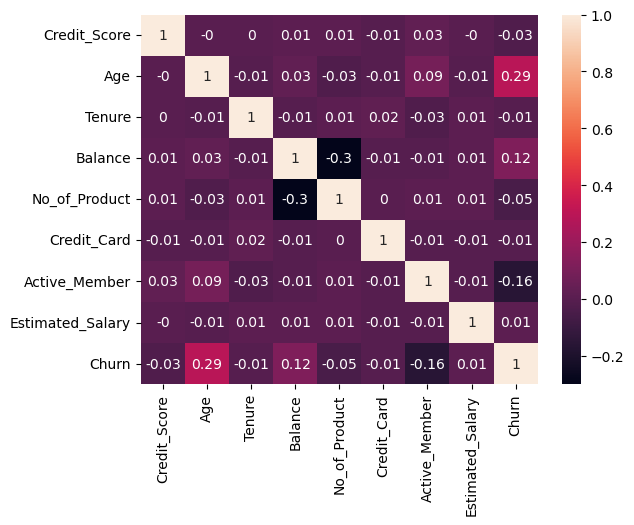

In [27]:
corr_matrix = df.corr().round(2)
plt.figure(dpi = 100)
sns.heatmap(corr_matrix,annot = True)

C:\Users\barai\AppData\Local\Temp\ipykernel_22188\479239666.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Estimated_Salary'],kde = True)


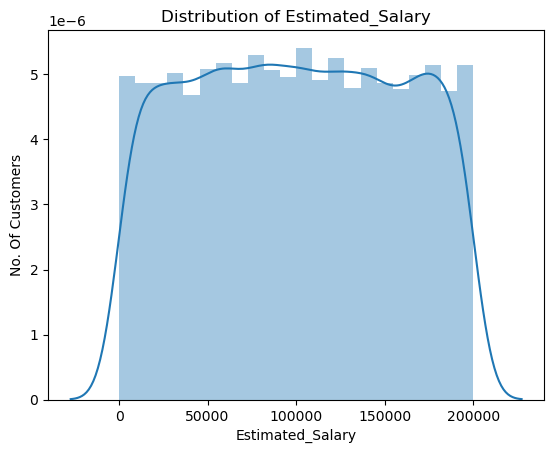

In [24]:
sns.distplot(df['Estimated_Salary'],kde = True)
plt.title('Distribution of Estimated_Salary')
plt.xlabel('Estimated_Salary')
plt.ylabel('No. Of Customers')
plt.show()

C:\Users\barai\AppData\Local\Temp\ipykernel_22188\645787801.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],kde = True,color = 'Red')


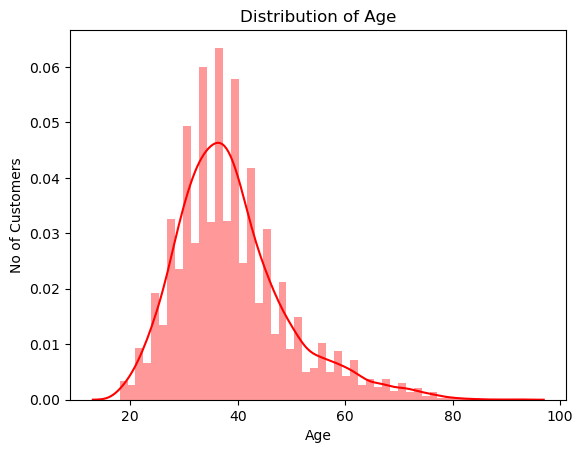

In [25]:
sns.distplot(df['Age'],kde = True,color = 'Red')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('No of Customers')
plt.show()

C:\Users\barai\AppData\Local\Temp\ipykernel_22188\2715698542.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Balance'],kde = True,color = 'violet')


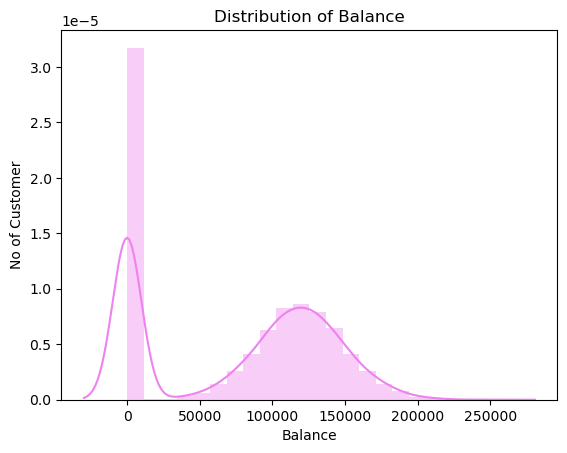

In [26]:
sns.distplot(df['Balance'],kde = True,color = 'violet')
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('No of Customer')
plt.show()

C:\Users\barai\AppData\Local\Temp\ipykernel_22188\2049800126.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.loc[df['Churn'] == 0, 'Credit_Score'], color = 'Blue', shade = True,label = 'No Churn')
C:\Users\barai\AppData\Local\Temp\ipykernel_22188\2049800126.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.loc[df['Churn'] == 1, 'Credit_Score'],color = 'Red',shade = True,label = 'Churn')


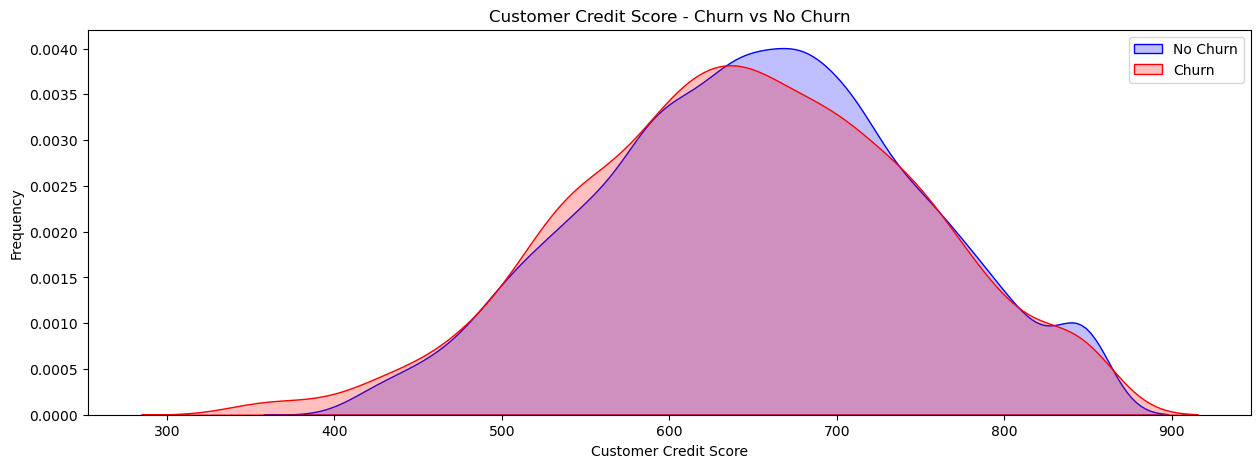

In [27]:
plt.figure(figsize = (15,5))

ax = sns.kdeplot(df.loc[df['Churn'] == 0, 'Credit_Score'], color = 'Blue', shade = True,label = 'No Churn')
ax = sns.kdeplot(df.loc[df['Churn'] == 1, 'Credit_Score'],color = 'Red',shade = True,label = 'Churn')

ax.set(xlabel = 'Customer Credit Score', ylabel = 'Frequency')
plt.title('Customer Credit Score - Churn vs No Churn')

ax.legend()

plt.show()

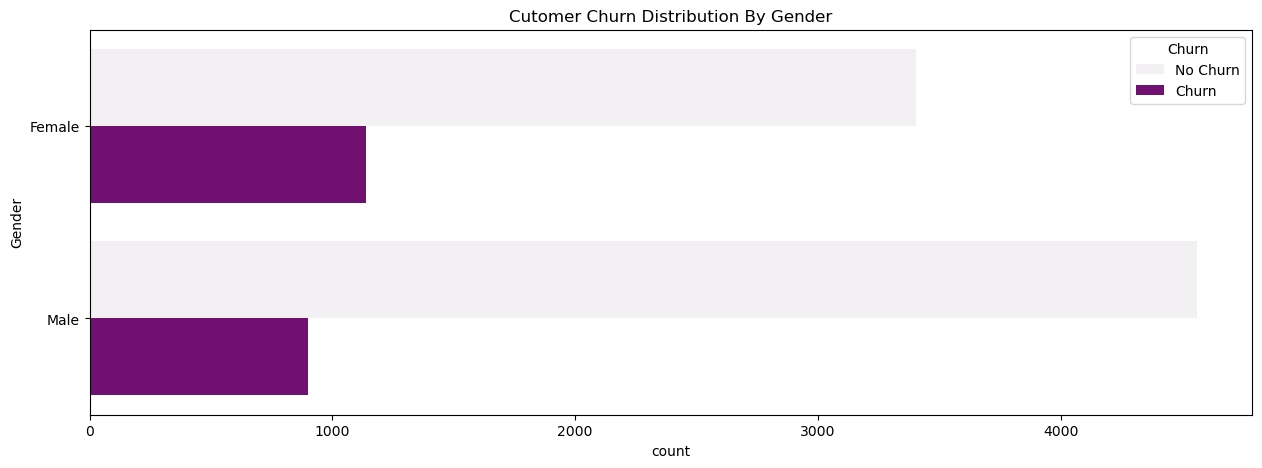

In [28]:
plt.figure(figsize = (15,5))

p = sns.countplot(y = 'Gender', hue = 'Churn', data = df, color = 'purple')
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text('No Churn')
legend_txt[1].set_text('Churn')
p.set_title('Cutomer Churn Distribution By Gender')
plt.show()

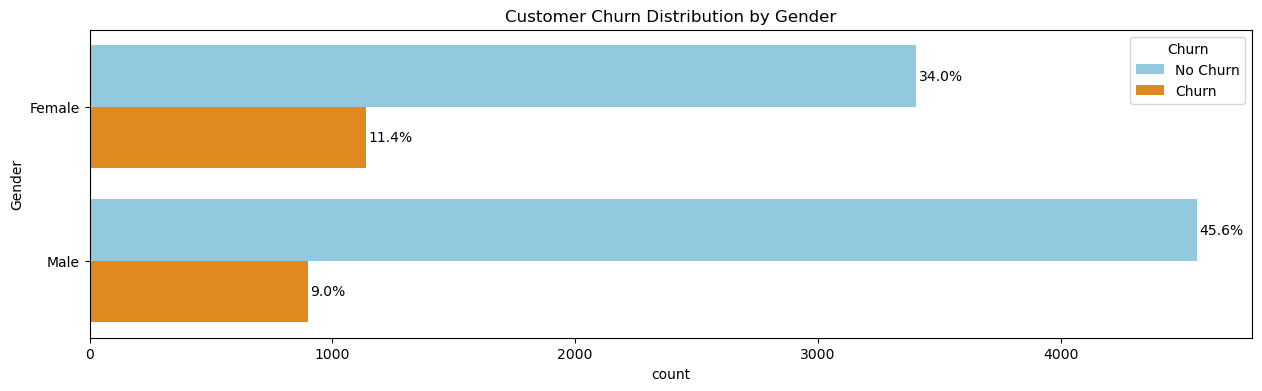

In [30]:
custom_palette = ['#87CEEB', '#FF8C00']

plt.figure(figsize=(15, 4))

p = sns.countplot(y="Gender", hue='Churn', data=df, palette=custom_palette)
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Churn Distribution by Gender')

# Calculate and annotate with percentages
total = len(df)
for patch in p.patches:
    width = patch.get_width()
    percentage = f'{100 * width / total:.1f}%'
    x = width + 10  # Adjust the x-position of the text
    y = patch.get_y() + patch.get_height() / 2
    p.annotate(percentage, (x, y), fontsize=10, color='black', va='center')

plt.show()

C:\Users\barai\AppData\Local\Temp\ipykernel_22188\3947153488.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.loc[df['Churn'] == 0, 'Age'],color = 'Blue', shade = True, label = 'No Churn')
C:\Users\barai\AppData\Local\Temp\ipykernel_22188\3947153488.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.loc[df['Churn'] == 1, 'Age'], color = 'Red', shade = True, label = 'Churn')


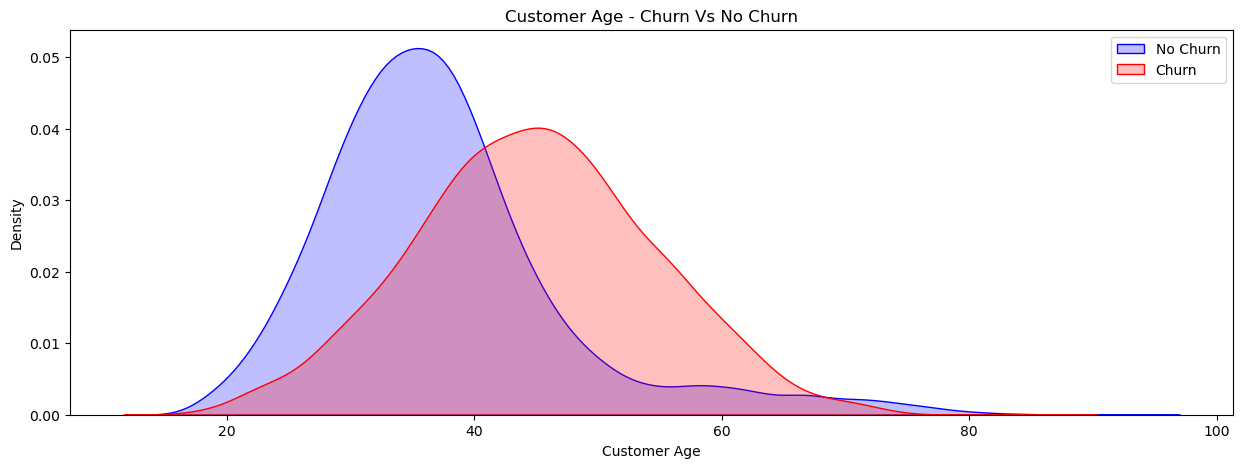

In [31]:
plt.figure(figsize = (15,5))

ax = sns.kdeplot(df.loc[df['Churn'] == 0, 'Age'],color = 'Blue', shade = True, label = 'No Churn')
ax = sns.kdeplot(df.loc[df['Churn'] == 1, 'Age'], color = 'Red', shade = True, label = 'Churn')

ax.set(xlabel = 'Customer Age')
plt.title('Customer Age - Churn Vs No Churn')

ax.legend()

plt.show()

C:\Users\barai\AppData\Local\Temp\ipykernel_22188\963559004.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.loc[df['Churn'] == 0, 'Tenure'],color = 'Blue', shade = True, label = 'No Churn')
C:\Users\barai\AppData\Local\Temp\ipykernel_22188\963559004.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.loc[df['Churn'] == 1, 'Tenure'], color = 'Red', shade = True, label = 'Churn')


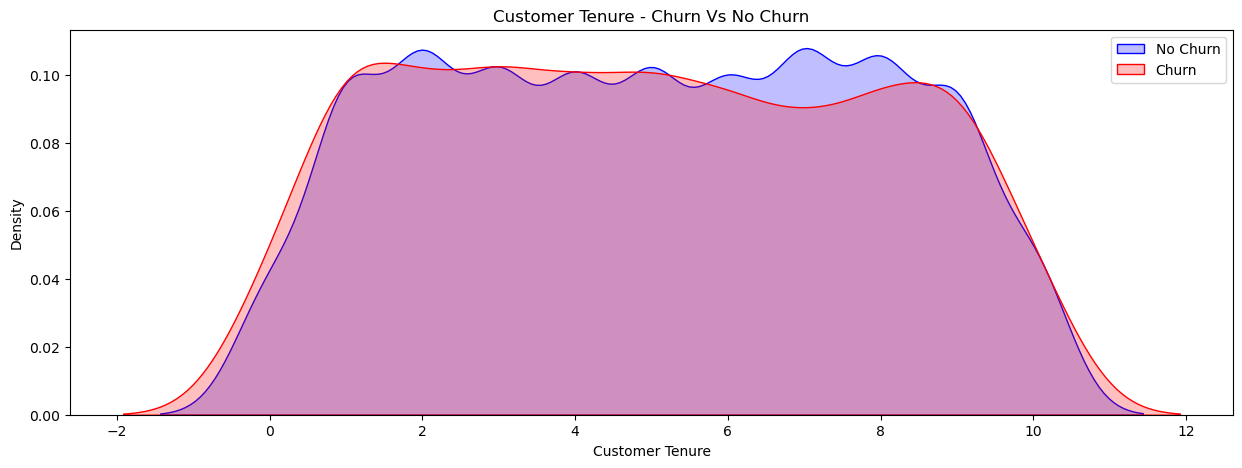

In [32]:
plt.figure(figsize = (15,5))

ax = sns.kdeplot(df.loc[df['Churn'] == 0, 'Tenure'],color = 'Blue', shade = True, label = 'No Churn')
ax = sns.kdeplot(df.loc[df['Churn'] == 1, 'Tenure'], color = 'Red', shade = True, label = 'Churn')

ax.set(xlabel = 'Customer Tenure')
plt.title('Customer Tenure - Churn Vs No Churn')

ax.legend()

plt.show()

C:\Users\barai\AppData\Local\Temp\ipykernel_22188\1577756379.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.loc[df['Churn'] == 0, 'Balance'],color = 'Blue',shade = True,label = 'No Churn')
C:\Users\barai\AppData\Local\Temp\ipykernel_22188\1577756379.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.loc[df['Churn'] == 1, 'Balance'], color = 'Red',shade = True,label = 'Churn')


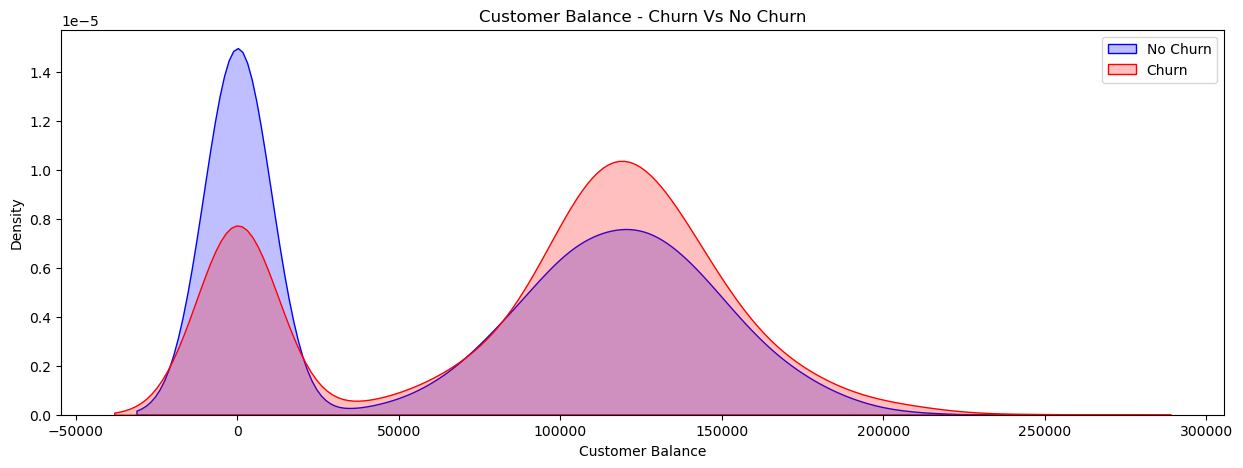

In [33]:
plt.figure(figsize = (15,5))

ax = sns.kdeplot(df.loc[df['Churn'] == 0, 'Balance'],color = 'Blue',shade = True,label = 'No Churn')
ax = sns.kdeplot(df.loc[df['Churn'] == 1, 'Balance'], color = 'Red',shade = True,label = 'Churn')

ax.set(xlabel = 'Customer Balance')
plt.title('Customer Balance - Churn Vs No Churn')

ax.legend()

plt.show()



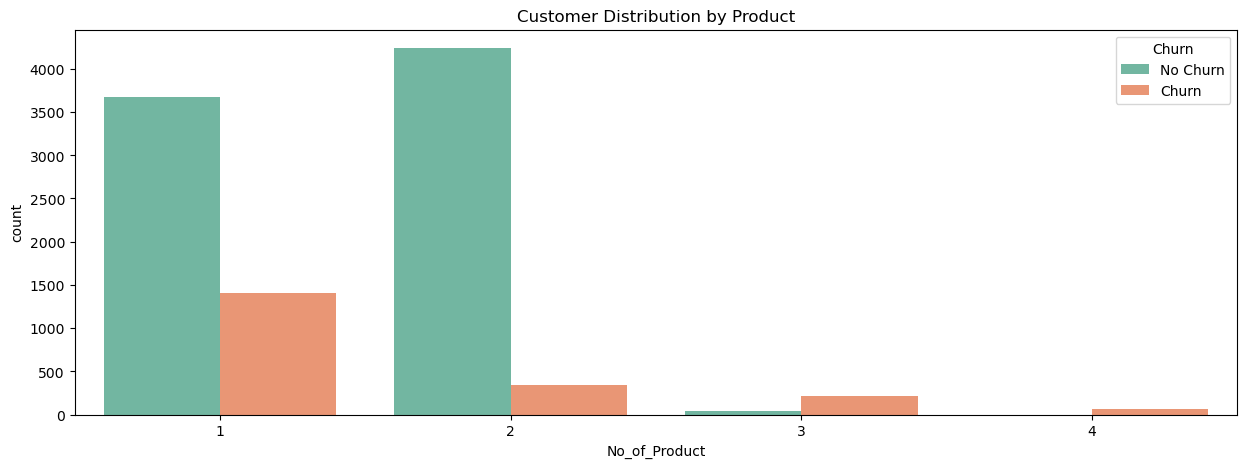

In [34]:
plt.figure(figsize=(15, 5))

p = sns.countplot(x = 'No_of_Product', hue = 'Churn', data = df, palette = 'Set2') 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Customer Distribution by Product')

    
plt.show()

Text(0.5, 1.0, 'Number of Product VS Balance')

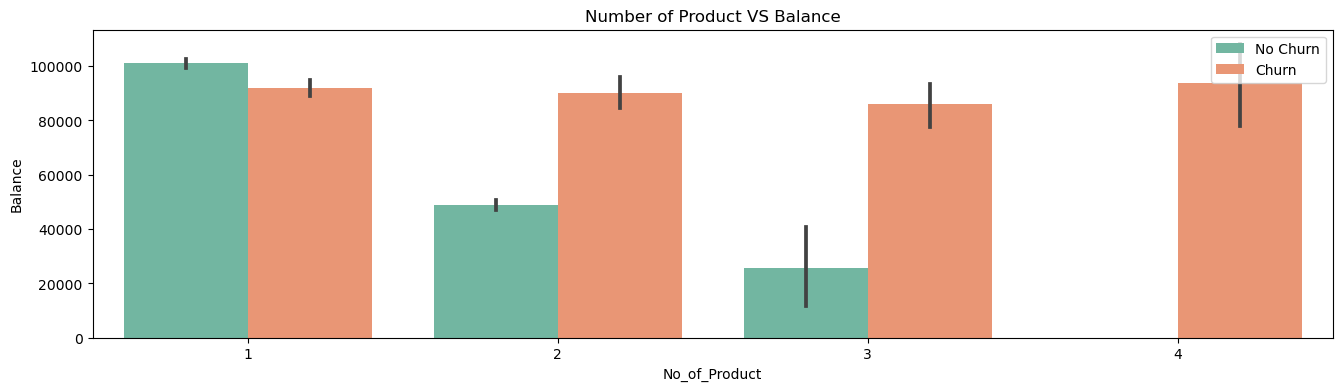

In [35]:
plt.figure(figsize = (16, 4)) 
p=sns.barplot(x = 'No_of_Product', y = 'Balance', hue = 'Churn', data = df, palette = 'Set2') 
p.legend(loc = 'upper right') 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Number of Product VS Balance') 

#### Model

In [36]:
df["Geography"] = df["Geography"].astype('category').cat.codes
df["Gender"] = df["Gender"].astype('category').cat.codes
df["Credit_Card"] = df["Credit_Card"].astype('category').cat.codes
df["Churn"] = df["Churn"].astype('category').cat.codes

In [37]:
x = df.drop('Churn', axis=1)
y = df['Churn']

validation_size = 0.2
seed = 11
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = validation_size, random_state = seed)
scoring = 'accuracy'


In [38]:
#Applying Model
num_folds = 10
models = []
models.append(('LR', LogisticRegression()))
models.append(('DTS', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# Boosting methods
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier()))
     

results = []
names = []

In [39]:

for name, model in models:
    kfold = KFold(n_splits = num_folds)
    cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.788000 (0.021015)
DTS: 0.787125 (0.011320)
KNN: 0.760375 (0.015881)
NB: 0.782500 (0.024122)
SVM: 0.795125 (0.021246)
GBM: 0.862500 (0.016037)
RF: 0.860250 (0.018539)


#### optuna 

In [41]:
# Define the objective function for Optuna
def objective(trial):
    model_name = trial.suggest_categorical('model', ['LR', 'DTS', 'KNN', 'NB', 'SVM', 'GBM', 'RF'])
    
    if model_name == 'LR':
        model = LogisticRegression()
    elif model_name == 'DTS':
        model = DecisionTreeClassifier()
    elif model_name == 'KNN':
        model = KNeighborsClassifier()
    elif model_name == 'NB':
        model = GaussianNB()
    elif model_name == 'SVM':
        model = SVC()
    elif model_name == 'GBM':
        model = GradientBoostingClassifier()
    elif model_name == 'RF':
        model = RandomForestClassifier()

    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    
    return cv_results.mean()

# Split your data into train and validation sets
x = df.drop('Churn', axis=1)
y = df['Churn']
validation_size = 0.2
seed = 11
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=validation_size, random_state=seed)
scoring = 'accuracy'
num_folds = 10

# Create an Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)  # You can adjust the number of trials

# Get the best hyperparameters and model name
best_params = study.best_params
best_model_name = best_params['model']

# Train the best model on the full training data
best_model = None
if best_model_name == 'LR':
    best_model = LogisticRegression()
elif best_model_name == 'DTS':
    best_model = DecisionTreeClassifier()
elif best_model_name == 'KNN':
    best_model = KNeighborsClassifier()
elif best_model_name == 'NB':
    best_model = GaussianNB()
elif best_model_name == 'SVM':
    best_model = SVC()
elif best_model_name == 'GBM':
    best_model = GradientBoostingClassifier()
elif best_model_name == 'RF':
    best_model = RandomForestClassifier()

best_model.fit(x_train, y_train)

# Evaluate the best model on the test set
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Best Model: {best_model_name}')
print(f'Best Model Accuracy on Test Set: {accuracy}')

# Optionally, you can save the best model for future use
# import joblib
# joblib.dump(best_model, 'best_model.pkl')

[I 2023-10-09 17:58:24,558] A new study created in memory with name: no-name-306ad539-176b-4749-8e24-8e6421e13db1
[I 2023-10-09 17:58:25,321] Trial 0 finished with value: 0.760375 and parameters: {'model': 'KNN'}. Best is trial 0 with value: 0.760375.
[I 2023-10-09 17:58:25,449] Trial 1 finished with value: 0.7825 and parameters: {'model': 'NB'}. Best is trial 1 with value: 0.7825.
[I 2023-10-09 17:58:47,195] Trial 2 finished with value: 0.8625 and parameters: {'model': 'GBM'}. Best is trial 2 with value: 0.8625.
[I 2023-10-09 17:58:47,312] Trial 3 finished with value: 0.7825 and parameters: {'model': 'NB'}. Best is trial 2 with value: 0.8625.
[I 2023-10-09 17:58:47,877] Trial 4 finished with value: 0.788 and parameters: {'model': 'LR'}. Best is trial 2 with value: 0.8625.
[I 2023-10-09 17:58:48,664] Trial 5 finished with value: 0.760375 and parameters: {'model': 'KNN'}. Best is trial 2 with value: 0.8625.
[I 2023-10-09 17:59:10,950] Trial 6 finished with value: 0.8630000000000001 and 

Best Model: GBM
Best Model Accuracy on Test Set: 0.8605


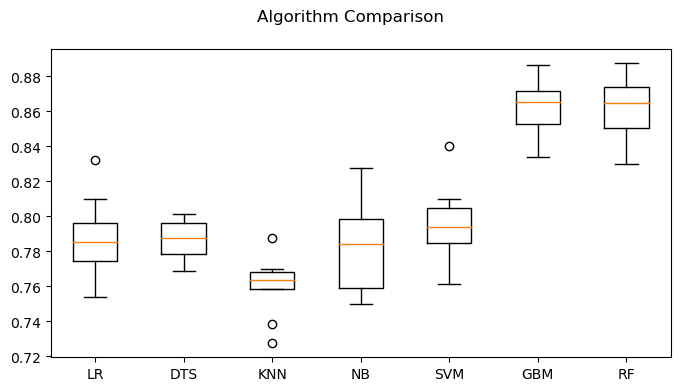

In [42]:

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
plt.show()

In [43]:
# Using GradientBoostingClassifier

In [44]:
model = GradientBoostingClassifier()
model.fit(x_train,y_train)

GradientBoostingClassifier()

In [45]:
#Checking Accuracy and Rescaling

model = LogisticRegression()

# Fit the model to your training data
model.fit(x_train, y_train)


pred = model.predict(x_test)

# Calculate accuracy and print other metrics
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))




0.794
[[1559   43]
 [ 369   29]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1602
           1       0.40      0.07      0.12       398

    accuracy                           0.79      2000
   macro avg       0.61      0.52      0.50      2000
weighted avg       0.73      0.79      0.73      2000



In [46]:
#Model Tuning
#Applying Model
scoring = 'precision'
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits = num_folds)
    cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.383065 (0.100807)
DTS: 0.477946 (0.053357)
KNN: 0.261950 (0.057102)
NB: 0.356483 (0.068954)


C:\Users\barai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\barai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\barai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\barai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision 

SVM: 0.000000 (0.000000)
GBM: 0.774081 (0.038515)
RF: 0.765563 (0.054757)


In [47]:

model = RandomForestClassifier()
model.fit(x_train, y_train)


pred = model.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.866
[[1538   64]
 [ 204  194]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1602
           1       0.75      0.49      0.59       398

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000



In [48]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8000, 10)
(8000,)
(2000, 10)
(2000,)


In [49]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 1639
Before OverSampling, counts of label '0': 6361 

After OverSampling, the shape of train_X: (12722, 10)
After OverSampling, the shape of train_y: (12722,) 

After OverSampling, counts of label '1': 6361
After OverSampling, counts of label '0': 6361


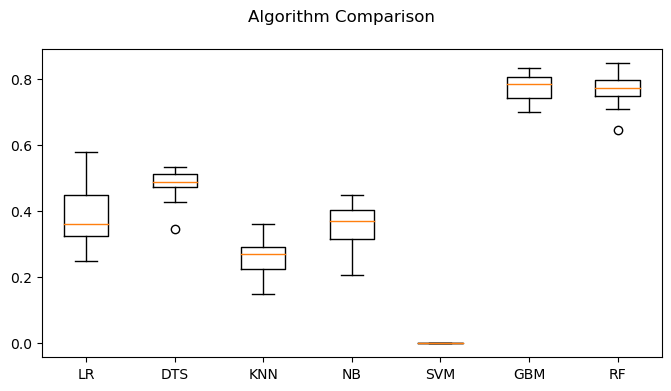

In [50]:

#Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
plt.show()

In [52]:
x = df.drop('Churn', axis=1)
y = df['Churn']

validation_size = 0.2
seed = 11
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x, y, test_size = validation_size, random_state = seed)

#Tuning Hyper Parameters

n_estimators = [20, 180, 1000]
max_depth= [2, 3, 5]
param_grid = dict(n_estimators = n_estimators, max_depth = max_depth)
model = GradientBoostingClassifier()
kfold = KFold(n_splits = num_folds)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(x_train_new, y_train_new)

#Printing Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.864000 using {'max_depth': 3, 'n_estimators': 180}
#8 0.850625 (0.016137) with: {'max_depth': 2, 'n_estimators': 20}
#2 0.860250 (0.015008) with: {'max_depth': 2, 'n_estimators': 180}
#4 0.857875 (0.014938) with: {'max_depth': 2, 'n_estimators': 1000}
#6 0.853500 (0.016219) with: {'max_depth': 3, 'n_estimators': 20}
#1 0.864000 (0.015957) with: {'max_depth': 3, 'n_estimators': 180}
#7 0.852500 (0.016798) with: {'max_depth': 3, 'n_estimators': 1000}
#3 0.858875 (0.016417) with: {'max_depth': 5, 'n_estimators': 20}
#5 0.857500 (0.015752) with: {'max_depth': 5, 'n_estimators': 180}
#9 0.846375 (0.020853) with: {'max_depth': 5, 'n_estimators': 1000}


In [53]:
#applying Model
model = GradientBoostingClassifier(max_depth = 2,n_estimators = 100)
model.fit(x_train_new,y_train_new)

GradientBoostingClassifier(max_depth=2)

In [54]:
# Checking Accuracy
predictions = model.predict(x_test_new)
print(accuracy_score(y_test_new, predictions))
print(confusion_matrix(y_test_new, predictions))
print(classification_report(y_test_new, predictions))


0.8625
[[1541   61]
 [ 214  184]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1602
           1       0.75      0.46      0.57       398

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [55]:
# Accuracy is 86%

In [56]:
trainPred = model.predict_proba(x_train_new)[:,1]
testPred = model.predict_proba(x_test_new)[:,1]

roctrain = roc_auc_score(y_train_new,trainPred)
roctest = roc_auc_score(y_test_new,testPred)

print(f'Roc Train : {roctrain}')
print(f'Roc Test : {roctest}')

Roc Train : 0.8627227540767368
Roc Test : 0.8538173075113396


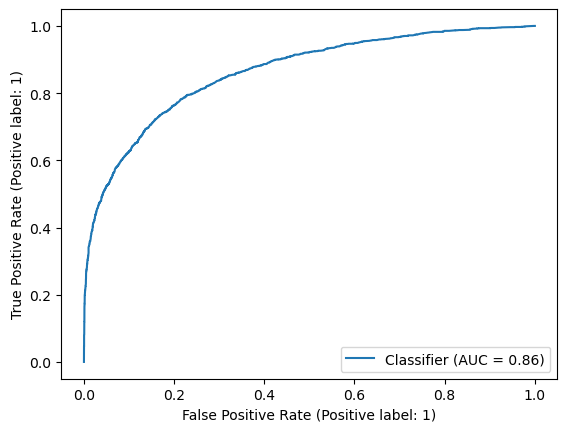

In [57]:
RocCurveDisplay.from_predictions(y_train_new,trainPred)

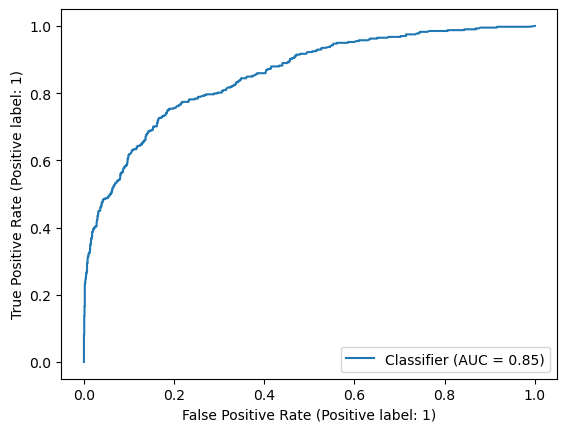

In [58]:
RocCurveDisplay.from_predictions(y_test_new,testPred)

In [59]:
##Creating Confusion Matrix
#df_cm = pd.DataFrame(confusion_matrix(y_test_new, predictions), columns = np.unique(y_test_new), index = np.unique(y_test_new))
#df_cm.index.name = 'Actual'
#df_cm.columns.name = 'Predicted'
#sns.heatmap(df_cm, cmap = "Blues", annot = True, annot_kws = {"size" : 16})# font size

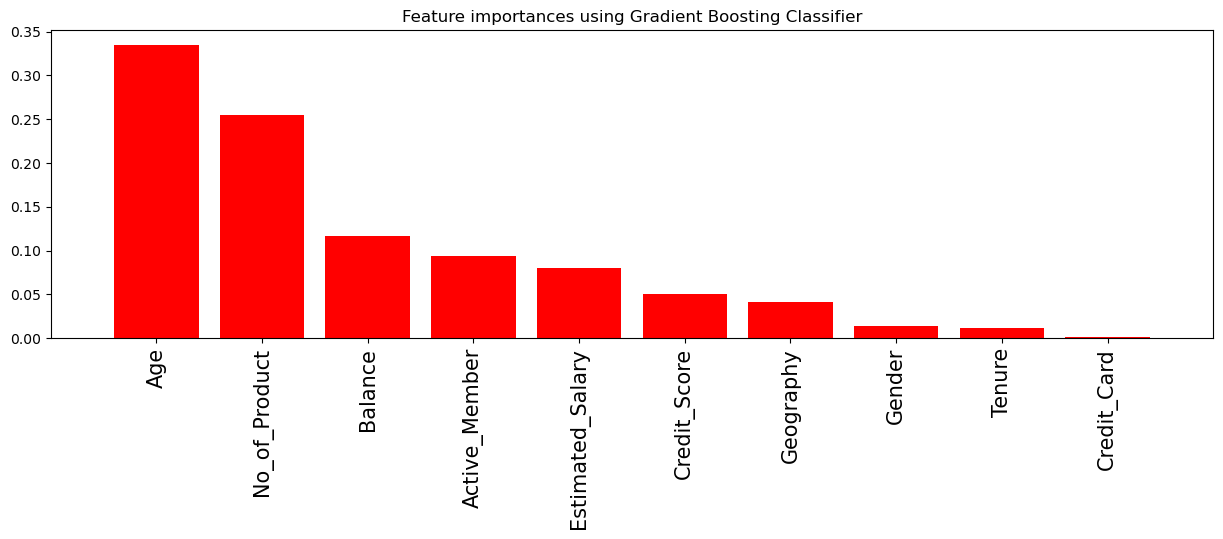

In [60]:
#Checking Best Features
#Applying Model
forest = GradientBoostingClassifier(n_estimators = 500, random_state = 1)
forest.fit(x_train_new, y_train_new)

Importances = forest.feature_importances_
Features = df.drop(['Churn'], axis = 1).columns

indices = np.argsort(Importances)[ :: -1]

plt.figure(figsize = (15, 4)) 
plt.title("Feature importances using Gradient Boosting Classifier") 
plt.bar(range(x_train.shape[1]), Importances[indices], color = "Red", align = "center") 
plt.xticks(range(x_train.shape[1]), Features[indices], rotation = 'vertical', fontsize = 15) 
plt.xlim([-1, x_train.shape[1]])
plt.show() 

In [61]:
feature_importance_df = pd.DataFrame({'Feature' : Features, 'Importance' : Importances})
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)
print(feature_importance_df)

            Feature  Importance
3               Age    0.334839
6     No_of_Product    0.254905
5           Balance    0.116308
8     Active_Member    0.093454
9  Estimated_Salary    0.080420
0      Credit_Score    0.050731
1         Geography    0.041856
2            Gender    0.014261
4            Tenure    0.011494
7       Credit_Card    0.001732


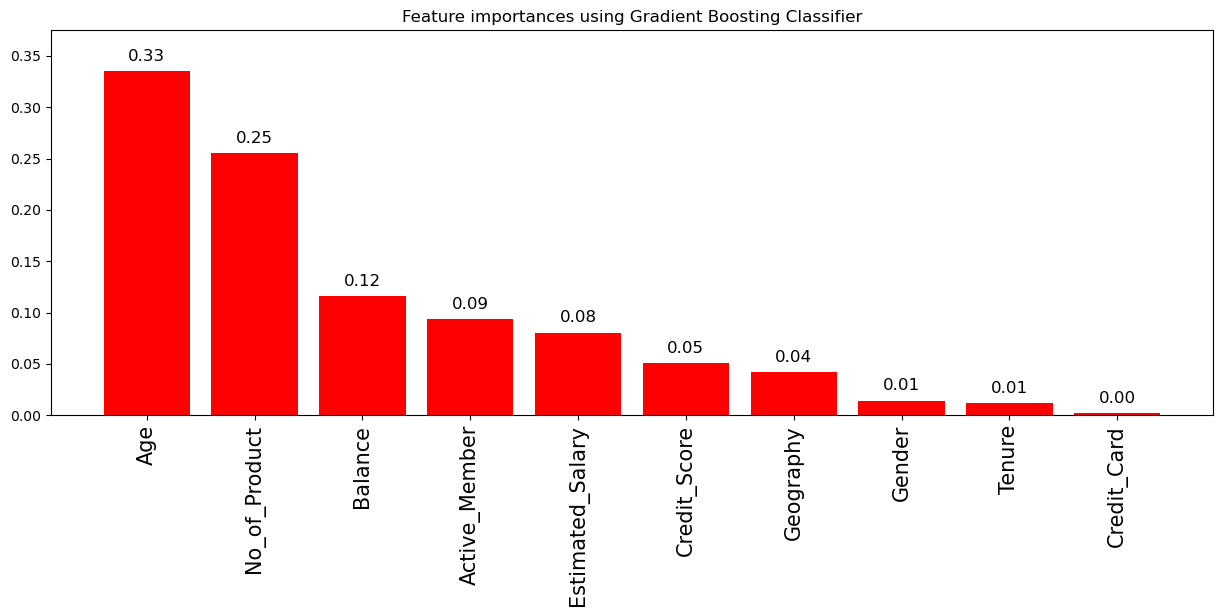

In [62]:
Importances = forest.feature_importances_
Features = df.drop(['Churn'], axis=1).columns

indices = np.argsort(Importances)[::-1]

plt.figure(figsize=(15, 5))
plt.title("Feature importances using Gradient Boosting Classifier")

# Create the bar chart
bars = plt.bar(range(x_train_new.shape[1]), Importances[indices], color="red", align="center")
plt.xticks(range(x_train_new.shape[1]), Features[indices], rotation='vertical', fontsize=15)

# Calculate the upper limit of the y-axis
y_max = max(Importances) + 0.04# Adjust the 0.05 as needed

plt.ylim([0, y_max])  # Set the y-axis limits

# Add text labels above the bars
for i, val in enumerate(Importances[indices]):
    plt.text(i, val + 0.01, f'{val:.2f}', horizontalalignment='center', fontsize=12)

plt.show()